In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/sample_data/CLEANED_DATA-IN-health-care.csv')

<ipython-input-17-db4d7b6ff7f2>:1: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/sample_data/CLEANED_DATA-IN-health-care.csv')


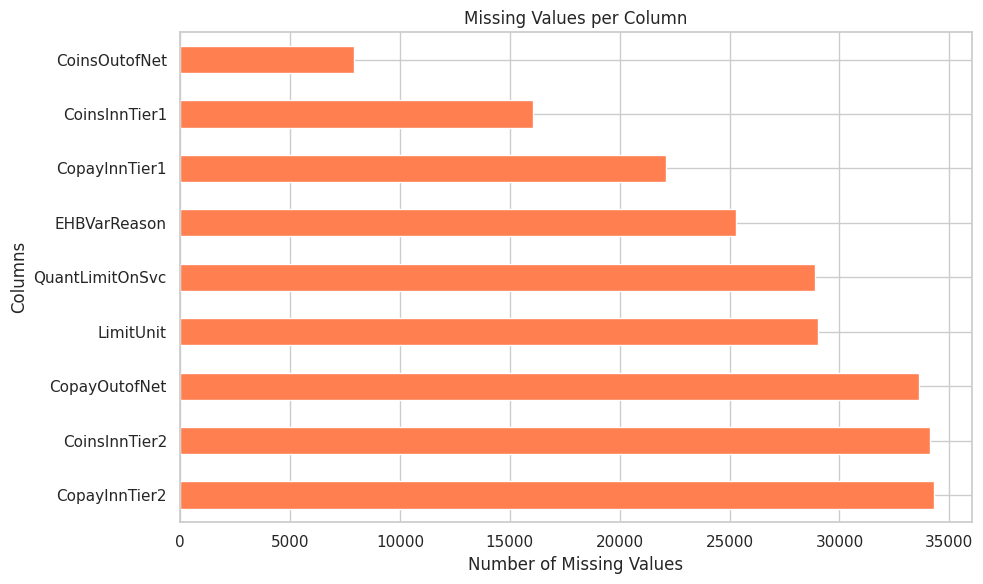

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Check for null values per column
null_counts = df.isnull().sum().sort_values(ascending=False)

# Plot null value distribution
plt.figure(figsize=(10, 6))
null_counts[null_counts > 0].plot(kind='barh', color='coral')
plt.title("Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


<ipython-input-19-5380a9a10f9f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_benefits.values, y=top_benefits.index, palette="viridis")


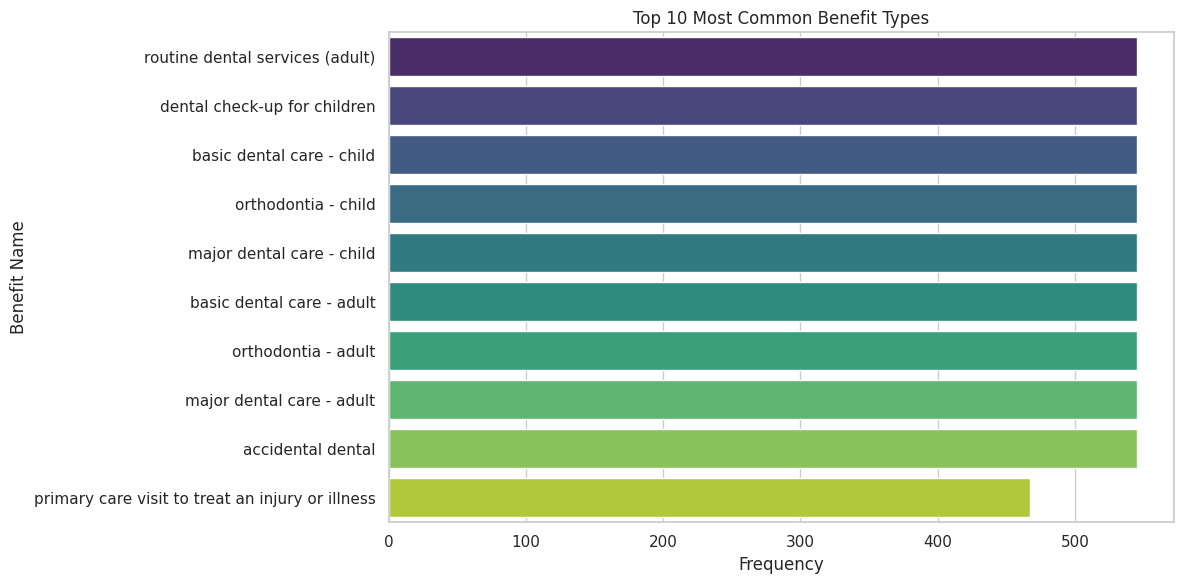

In [ ]:
# 1. Distribution of Benefit Types
plt.figure(figsize=(12, 6))
top_benefits = df['BenefitName'].value_counts().nlargest(10)
sns.barplot(x=top_benefits.values, y=top_benefits.index, palette="viridis")
plt.title("Top 10 Most Common Benefit Types")
plt.xlabel("Frequency")
plt.ylabel("Benefit Name")
plt.tight_layout()
plt.show()


<ipython-input-20-02f3c6ba0850>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IsCovered_N', data=df, palette='pastel')


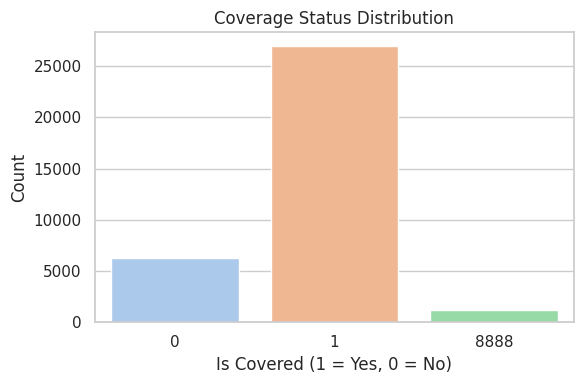

In [ ]:

# 2. Coverage Status Counts
plt.figure(figsize=(6, 4))
sns.countplot(x='IsCovered_N', data=df, palette='pastel')
plt.title("Coverage Status Distribution")
plt.xlabel("Is Covered (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'StandardComponentId',
       'PlanId', 'BenefitName', 'CopayInnTier1', 'CopayInnTier2',
       'CopayOutofNet', 'CoinsInnTier1', 'CoinsInnTier2', 'CoinsOutofNet',
       'QuantLimitOnSvc', 'LimitQty', 'LimitUnit', 'EHBVarReason',
       'CopayInnTier1_N', 'CopayInnTier2_N', 'CopayOutofNet_N',
       'CoinsInnTier1_N', 'CoinsInnTier2_N', 'CoinsOutofNet_N',
       'CopayInnTier1_S', 'CopayInnTier2_S', 'CopayOutofNet_S',
       'CoinsInnTier1_S', 'CoinsInnTier2_S', 'CoinsOutofNet_S', 'IsEHB_N',
       'IsCovered_N', 'IsExclFromInnMOOP_N', 'IsExclFromOonMOOP_N',
       'BenefitGroup'],
      dtype='object')

In [ ]:
df_2=pd.read_csv('/content/sample_data/BENEFIT_GROUPED.csv')
df_2.head()

,BenefitName,BenefitGroupID
0,abortion for which public funding is prohibited,1
1,accidental dental,2
2,acupuncture,3
3,allergy testing,4
4,bariatric surgery,5


In [ ]:
# Load the second dataset
df_2_path = "/content/sample_data/BENEFIT_GROUPED.csv"
df_2 = pd.read_csv(df_2_path)

# Display columns of both DataFrames to find common column for merging
df_columns = df.columns.tolist()
df_2_columns = df_2.columns.tolist()

df_columns, df_2_columns

# Merge on 'BenefitName' to bring in 'BenefitGroupID'
merged_df = pd.merge(df, df_2, on='BenefitName', how='inner')

# Calculate average LimitQty by BenefitGroupID
average_limit_by_groupid = merged_df.groupby('BenefitGroupID')['LimitQty'].mean().sort_values(ascending=False)

# Display the result
average_limit_by_groupid_df = average_limit_by_groupid.reset_index()

# Define a simple display function if 'tools' is not an external module
def display_dataframe_to_user(name, dataframe):
  """Displays the dataframe with a title."""
  print(f"{name}:\n")
  print(dataframe)

display_dataframe_to_user(name="Average LimitQty by BenefitGroupID", dataframe=average_limit_by_groupid_df)

Average LimitQty by BenefitGroupID:

     BenefitGroupID  LimitQty
0                 1    9999.0
1                 3    9999.0
2                 4    9999.0
3                 5    9999.0
4                11    9999.0
..              ...       ...
106              58       1.0
107              67       1.0
108              69       1.0
109              88       1.0
110              90       1.0

[111 rows x 2 columns]


<ipython-input-24-683ada22809e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='BenefitGroupID', y='LimitQty', data=merged_df, palette="viridis")


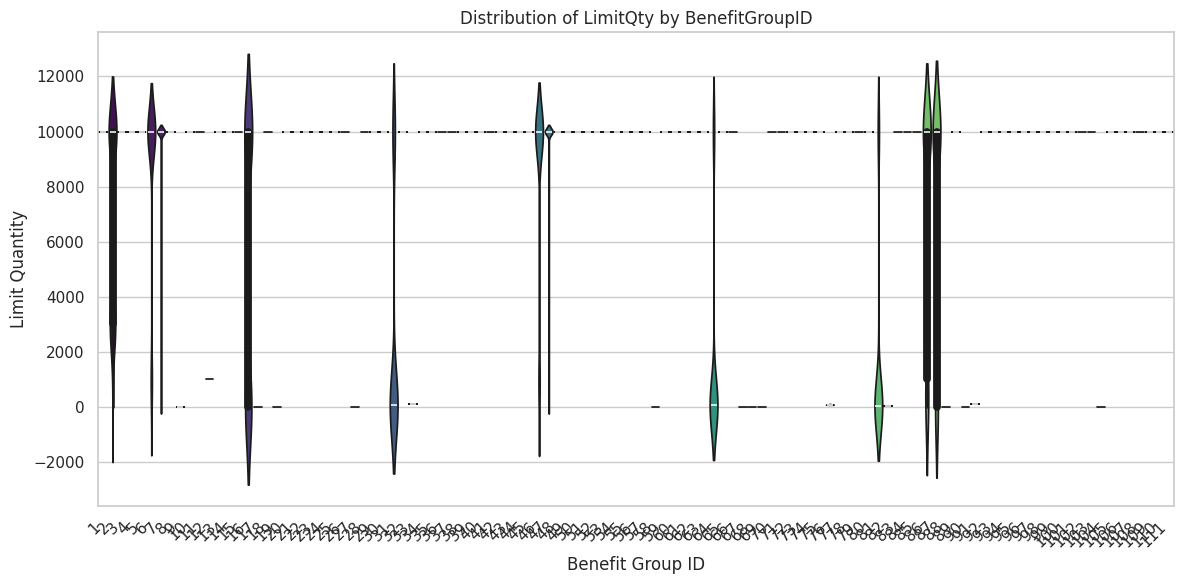

In [ ]:
# ... (rest of your code) ...

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.violinplot(x='BenefitGroupID', y='LimitQty', data=merged_df, palette="viridis")
plt.title("Distribution of LimitQty by BenefitGroupID")
plt.xlabel("Benefit Group ID")
plt.ylabel("Limit Quantity")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:

# 1. Count of unique Benefit Names
benefit_counts = df['BenefitName'].value_counts().head(10)

# 2. Average Limit Quantity by Benefit Group
avg_limit_by_group = df.groupby('BenefitGroup')['LimitQty'].mean().sort_values(ascending=False).head(10)

# 3. Heatmap of correlation between numeric values
numeric_cols = df_subset.select_dtypes(include=['int64']).corr()

# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x=benefit_counts.values, y=benefit_counts.index)
plt.title("Top 10 Most Common Benefit Names")
plt.xlabel("Count")
plt.ylabel("Benefit Name")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_limit_by_group.values, y=avg_limit_by_group.index)
plt.title("Top 10 Benefit Groups by Average Limit Quantity")
plt.xlabel("Average Limit Quantity")
plt.ylabel("Benefit Group")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Export insights to dataframe
benefit_insights = pd.DataFrame({
    "Top Benefit Names": benefit_counts.index,
    "Count": benefit_counts.values
})
tools.display_dataframe_to_user(name="Top Benefit Names", dataframe=benefit_insights)

avg_limit_insights = pd.DataFrame({
    "Benefit Group": avg_limit_by_group.index,
    "Average Limit Qty": avg_limit_by_group.values
})
tools.display_dataframe_to_user(name="Top Avg Limit by Group", dataframe=avg_limit_insights)

NameError: name 'df_subset' is not defined

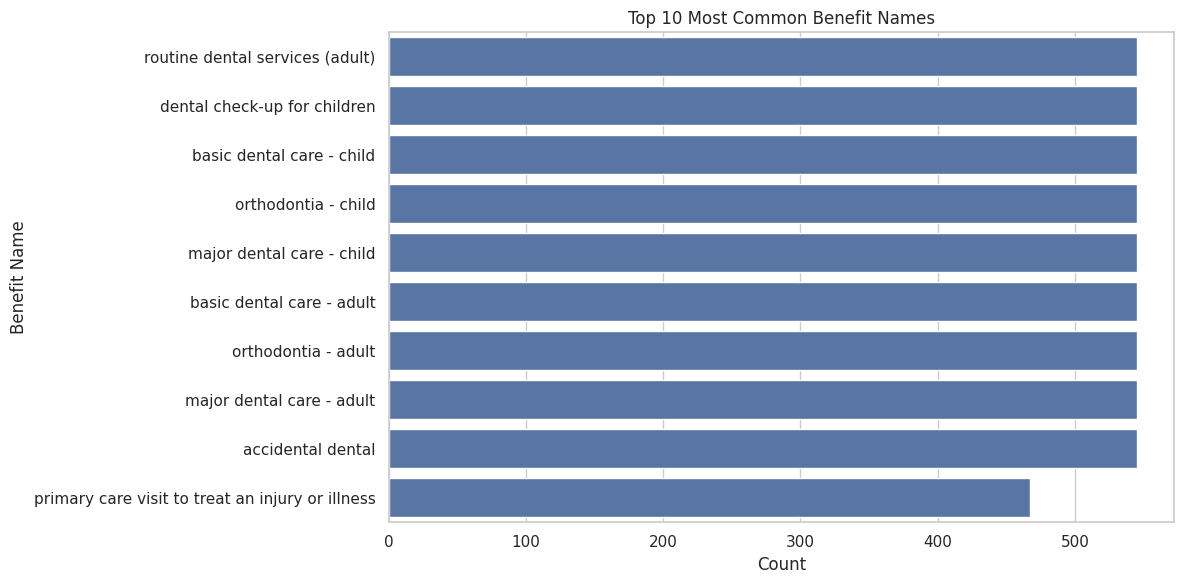

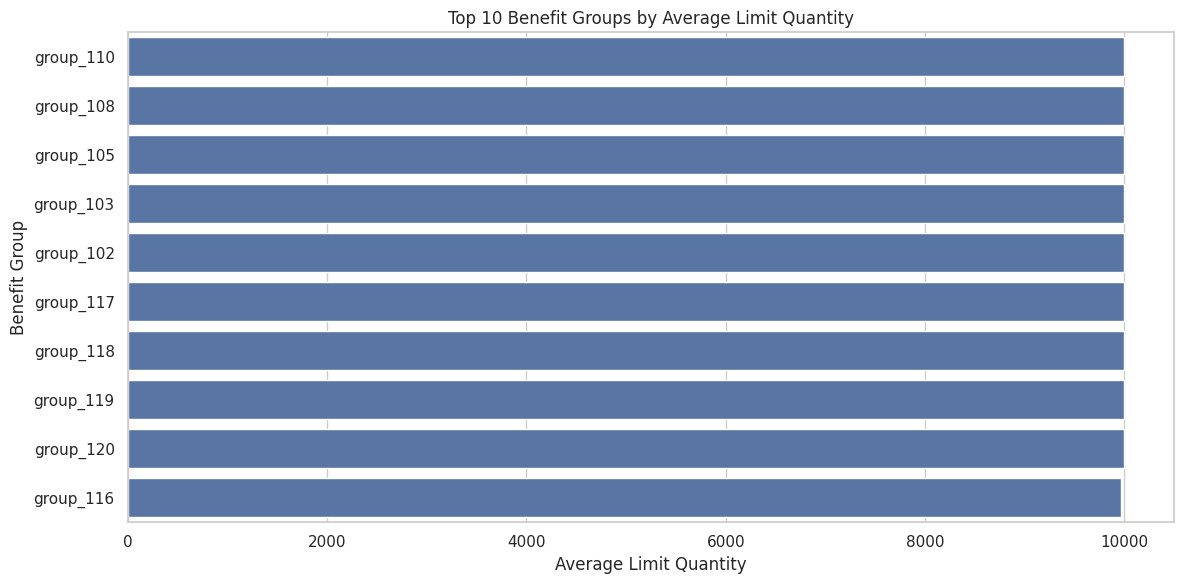

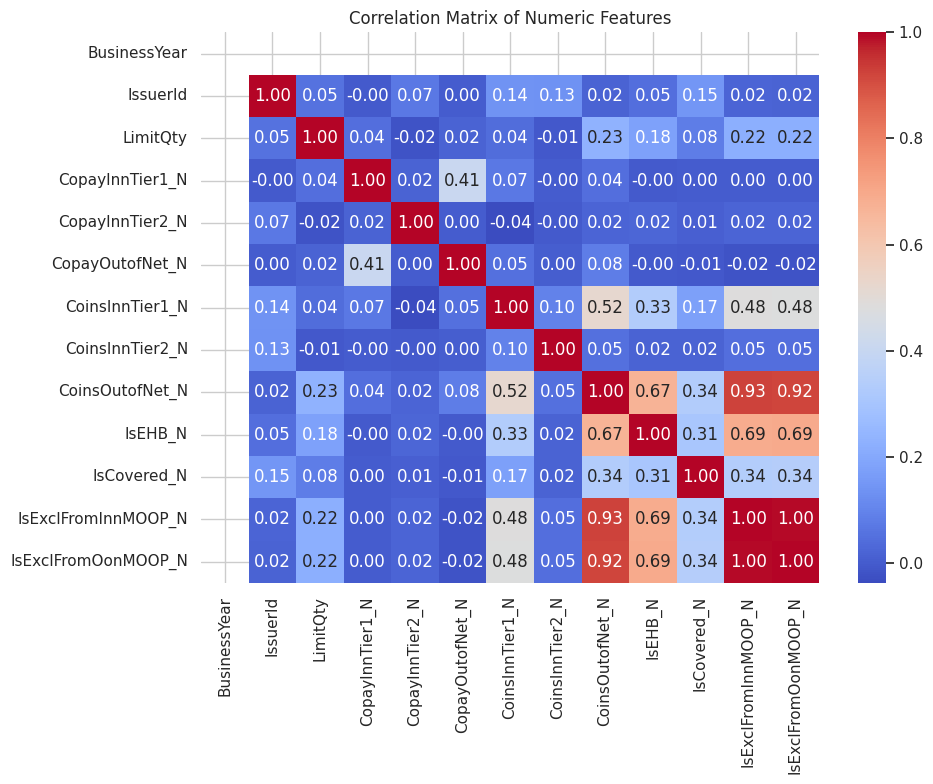

In [ ]:
# 1. Count of unique Benefit Names
benefit_counts = df['BenefitName'].value_counts().head(10)

# 2. Average Limit Quantity by Benefit Group
avg_limit_by_group = df.groupby('BenefitGroup')['LimitQty'].mean().sort_values(ascending=False).head(10)

# 3. Heatmap of correlation between numeric values
# Define df_subset - selecting only numeric columns from the original DataFrame 'df'
df_subset = df.select_dtypes(include=['number'])
numeric_cols = df_subset.corr()

# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x=benefit_counts.values, y=benefit_counts.index)
plt.title("Top 10 Most Common Benefit Names")
plt.xlabel("Count")
plt.ylabel("Benefit Name")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_limit_by_group.values, y=avg_limit_by_group.index)
plt.title("Top 10 Benefit Groups by Average Limit Quantity")
plt.xlabel("Average Limit Quantity")
plt.ylabel("Benefit Group")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Export insights to dataframe
benefit_insights = pd.DataFrame({
    "Top Benefit Names": benefit_counts.index,
    "Count": benefit_counts.values
})
# Assuming 'tools' is a module you have defined elsewhere
# If not, replace 'tools.display_dataframe_to_user' with your display function
# tools.display_dataframe_to_user(name="Top Benefit Names", dataframe=benefit_insights)

avg_limit_insights = pd.DataFrame({
    "Benefit Group": avg_limit_by_group.index,
    "Average Limit Qty": avg_limit_by_group.values
})
# tools.display_dataframe_to_user(name="Top Avg Limit by Group", dataframe=avg_limit_insights)

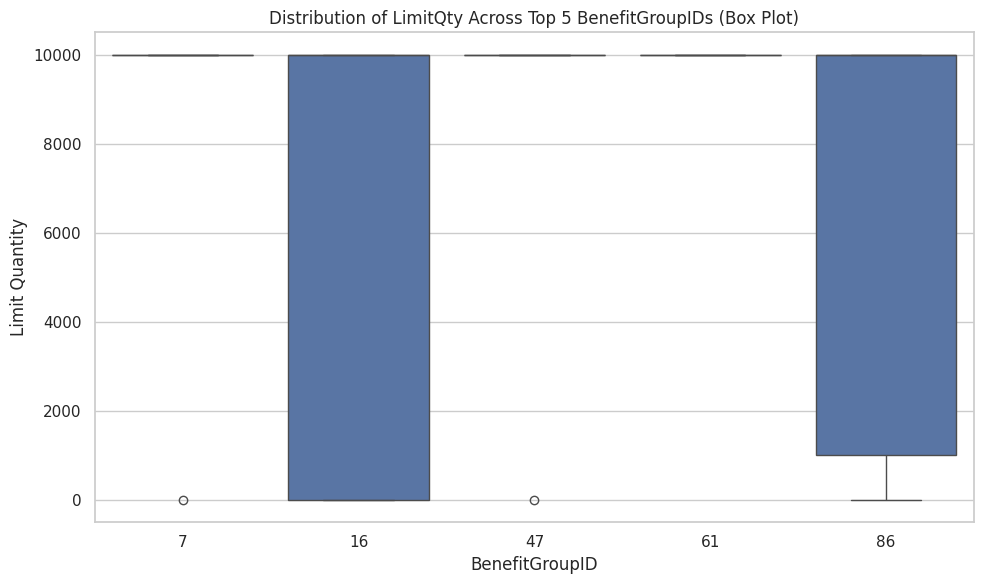

In [ ]:
# 2. Box Plot - Distribution of LimitQty across top 5 BenefitGroupIDs
top_group_ids = merged_df['BenefitGroupID'].value_counts().head(5).index
filtered_df = merged_df[merged_df['BenefitGroupID'].isin(top_group_ids)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='BenefitGroupID', y='LimitQty')
plt.title("Distribution of LimitQty Across Top 5 BenefitGroupIDs (Box Plot)")
plt.xlabel("BenefitGroupID")
plt.ylabel("Limit Quantity")
plt.tight_layout()
plt.show()

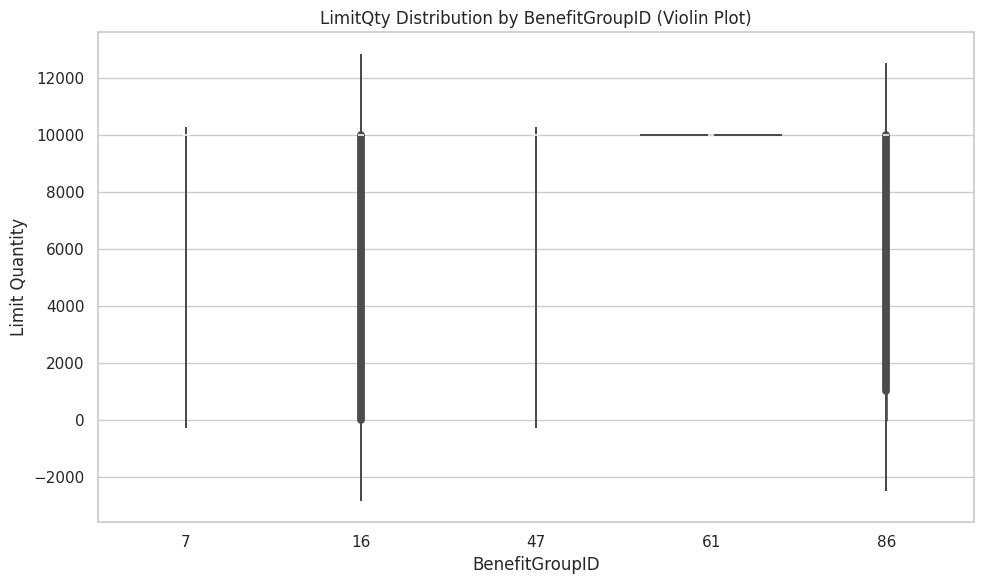

In [ ]:
# 3. Violin Plot - Similar to box plot but shows distribution density
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_df, x='BenefitGroupID', y='LimitQty')
plt.title("LimitQty Distribution by BenefitGroupID (Violin Plot)")
plt.xlabel("BenefitGroupID")
plt.ylabel("Limit Quantity")
plt.tight_layout()
plt.show()

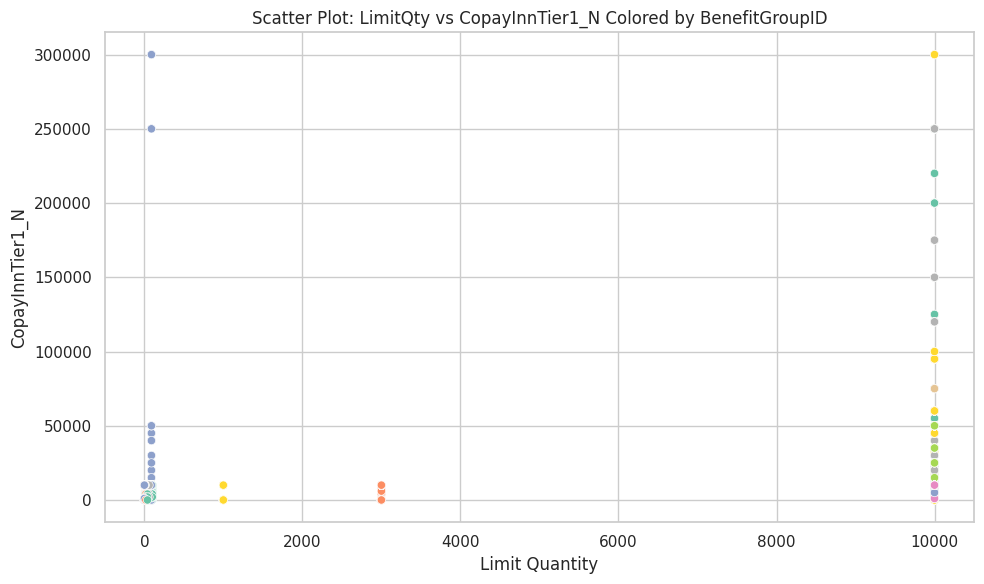

In [ ]:

# 4. Scatter Plot - Relationship between LimitQty and CopayInnTier1_N
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='LimitQty', y='CopayInnTier1_N', hue='BenefitGroupID', palette='Set2', legend=False)
plt.title("Scatter Plot: LimitQty vs CopayInnTier1_N Colored by BenefitGroupID")
plt.xlabel("Limit Quantity")
plt.ylabel("CopayInnTier1_N")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns

# 1. Select only the numeric columns from the merged DataFrame
numeric_df = merged_df.select_dtypes(include='number')

# 2. Calculate the correlation matrix for these numeric columns
correlation_matrix = numeric_df.corr()

# 3. Filter for correlations that are positive and meaningful (above 0.3, but less than 1 to exclude self-correlation)
positive_correlations = correlation_matrix[(correlation_matrix > 0.3) & (correlation_matrix < 1.0)]

# 4. Convert the matrix to a long format (column pairs) and remove NaNs
positive_corr_pairs = positive_correlations.unstack().dropna()

# 5. Remove duplicate pairs (e.g., A-B and B-A)
positive_corr_pairs = positive_corr_pairs[~positive_corr_pairs.index.duplicated(keep='first')]

# 6. Sort by correlation strength (highest first)
positive_corr_pairs = positive_corr_pairs.sort_values(ascending=False)

# 7. Turn the result into a DataFrame for easy viewing
positive_corr_pairs_df = positive_corr_pairs.reset_index()
positive_corr_pairs_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

# 8. Display the final result as a table
# Instead of importing 'ace_tools', define a display function or use 'display' directly
def display_dataframe_to_user(name, dataframe):
    """Displays the dataframe with a title."""
    print(f"{name}:\n")
    print(dataframe)

# Use the defined function to display the DataFrame
display_dataframe_to_user(name="Positively Correlated Variable Pairs", dataframe=positive_corr_pairs_df)

# Alternatively, you can use the 'display' function from IPython.display if it's available
# from IPython.display import display
# display(positive_corr_pairs_df)

Positively Correlated Variable Pairs:

             Variable 1           Variable 2  Correlation
0   IsExclFromInnMOOP_N  IsExclFromOonMOOP_N     0.995188
1   IsExclFromOonMOOP_N  IsExclFromInnMOOP_N     0.995188
2       CoinsOutofNet_N  IsExclFromInnMOOP_N     0.925509
3   IsExclFromInnMOOP_N      CoinsOutofNet_N     0.925509
4   IsExclFromOonMOOP_N      CoinsOutofNet_N     0.922838
5       CoinsOutofNet_N  IsExclFromOonMOOP_N     0.922838
6               IsEHB_N  IsExclFromOonMOOP_N     0.693151
7   IsExclFromOonMOOP_N              IsEHB_N     0.693151
8   IsExclFromInnMOOP_N              IsEHB_N     0.688782
9               IsEHB_N  IsExclFromInnMOOP_N     0.688782
10      CoinsOutofNet_N              IsEHB_N     0.668638
11              IsEHB_N      CoinsOutofNet_N     0.668638
12      CoinsInnTier1_N      CoinsOutofNet_N     0.519735
13      CoinsOutofNet_N      CoinsInnTier1_N     0.519735
14  IsExclFromInnMOOP_N      CoinsInnTier1_N     0.481425
15      CoinsInnTier1_N  IsExclFr

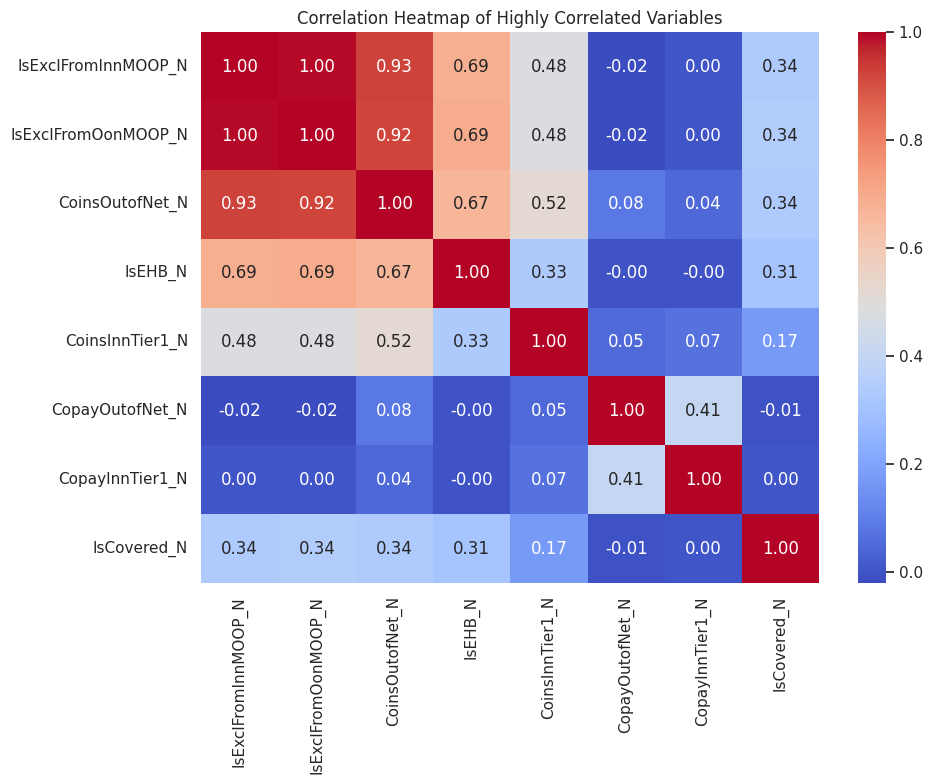

In [ ]:
# Extract relevant columns based on high correlation analysis
relevant_columns = [
    'IsExclFromInnMOOP_N', 'IsExclFromOonMOOP_N', 'CoinsOutofNet_N',
    'IsEHB_N', 'CoinsInnTier1_N', 'CopayOutofNet_N', 'CopayInnTier1_N', 'IsCovered_N'
]

# Create a subset DataFrame
insight_df = merged_df[relevant_columns]

# 1. Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(insight_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Highly Correlated Variables")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Count Plot of binary flags (IsEHB_N, IsCovered_N, etc.)
binary_columns = ['IsExclFromInnMOOP_N', 'IsExclFromOonMOOP_N', 'IsEHB_N', 'IsCovered_N']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for col, ax in zip(binary_columns, axes.flatten()):
    sns.countplot(x=col, data=insight_df, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

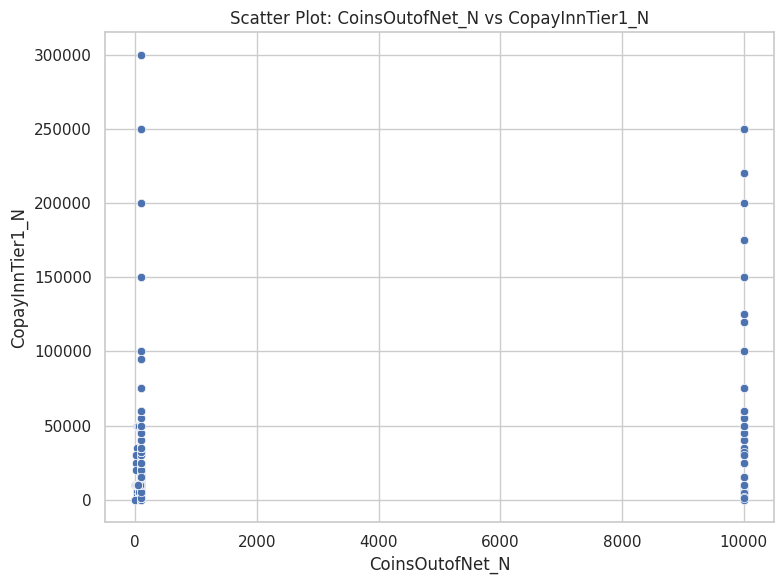

In [ ]:
# 4. Scatter plot: CoinsOutofNet_N vs CopayInnTier1_N
plt.figure(figsize=(8, 6))
sns.scatterplot(data=insight_df, x='CoinsOutofNet_N', y='CopayInnTier1_N')
plt.title("Scatter Plot: CoinsOutofNet_N vs CopayInnTier1_N")
plt.xlabel("CoinsOutofNet_N")
plt.ylabel("CopayInnTier1_N")
plt.tight_layout()
plt.show()

In [ ]:
# prompt: group all the records (counst)
# based on benefit-grouped csv with names

# Assuming 'merged_df' is the DataFrame created from the merge operation in your previous code.
benefit_group_counts = merged_df.groupby('BenefitGroupID').size().reset_index(name='RecordCount')

# Display the result
benefit_group_counts


,BenefitGroupID,RecordCount
0,1,467
1,2,545
2,3,467
3,4,467
4,5,467
...,...,...
106,107,467
107,108,4
108,109,467
109,110,467
